# PCA analysis on MNIST dataset

# import library

In [1]:
!pip install tensorflow
!pip install keras
!pip install tensorflow-datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# load the data set and fill nan value with 0

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784) # reshape the images to 1D vectors
X_test = X_test.reshape(-1, 784)
X_train = X_train.astype('float32') # convert to float
X_test = X_test.astype('float32')
X_train = np.nan_to_num(X_train) # fill nan values with 0
X_test = np.nan_to_num(X_test)

11490434/11490434 [==============================] - 0s 0us/step


# show 50 first of this images

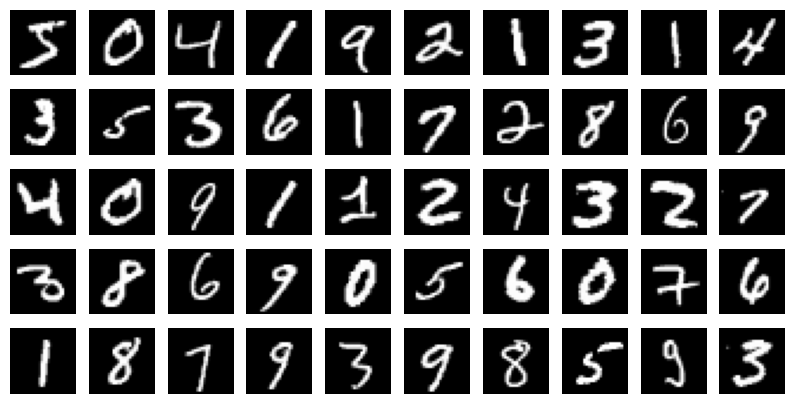

In [5]:
def show_images(num_images, X):
    plt.figure(figsize=(10, 5)) # set the figure size
    for i in range(num_images): # loop over the images
        plt.subplot(5, 10, i+1) # create subplots
        plt.imshow(X[i].reshape(28, 28), cmap='gray') # plot the images
        plt.axis('off') # turn off the axes
    plt.show() # show the plot

show_images(50, X_train) # show the first 50 images of the training set

# scale the data set to [0 1] + divide data to maximum value

In [6]:
scaler = StandardScaler() # create a scaler object
X_train_scaled = scaler.fit_transform(X_train) # fit and transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data
X_train_scaled = X_train_scaled / np.max(X_train_scaled) # divide by the maximum value
X_test_scaled = X_test_scaled / np.max(X_test_scaled)

# calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix

In [7]:
cov_matrix = np.cov(X_train_scaled.T) # calculate the covariance matrix of the transposed data
eig_values, eig_vectors = np.linalg.eig(cov_matrix) # calculate the eigenvalues and eigenvectors

In [8]:
# explained_variance = 0.7 # you can change this variable to get more component of datasets.
explained_variance = 0.7

In [9]:
# calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance
total_variance = np.sum(eig_values) # calculate the total variance
var_exp = [(i / total_variance) for i in eig_values] # calculate the variance explained by each eigenvalue
cum_var_exp = np.cumsum(var_exp) # calculate the cumulative variance explained

k = np.argmax(cum_var_exp >= explained_variance) + 1 # find the number of components that explain at least explained_variance of total variance

print(f'Number of components: {k}')
print(f'Explained variance: {cum_var_exp[k-1]}')

Number of components: 99
Explained variance: 0.70101687957679


#  calculate the compression_ratio

In [10]:
compression_ratio = k / len(eig_values)
print(f'Compression ratio: {compression_ratio}')

Compression ratio: 0.12627551020408162


# Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)

In [11]:
pca = PCA(n_components=k) # create a PCA object with k components
F_train = pca.fit_transform(X_train_scaled) # fit and transform the training data
F_test = pca.transform(X_test_scaled) # transform the test data

# Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)

In [12]:
X_train_reprojected = pca.inverse_transform(F_train) # reproject the reduced data to original dimensionality
X_test_reprojected = pca.inverse_transform(F_test)

# select on sample and reshape it to a 28 by 28 matrix and plot them as image

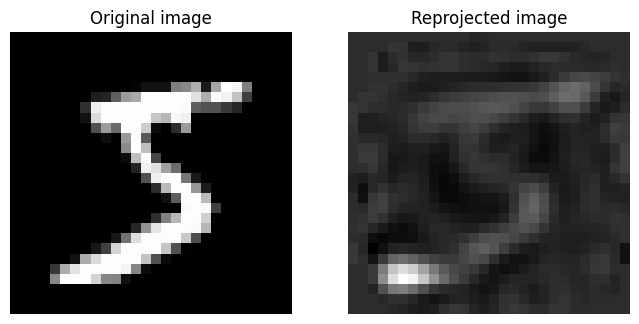

In [13]:
sample_index = 0 # choose a sample index
sample_original = X_train[sample_index].reshape(28, 28) # get the original image
sample_reprojected = X_train_reprojected[sample_index].reshape(28, 28) # get the reprojected image

plt.figure(figsize=(8, 4)) # set the figure size
plt.subplot(1, 2, 1) # create subplots
plt.imshow(sample_original, cmap='gray') # plot the original image
plt.title('Original image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(sample_reprojected, cmap='gray') # plot the reprojected image
plt.title('Reprojected image')
plt.axis('off')
plt.show()

#  plot the dimentionally reduced data

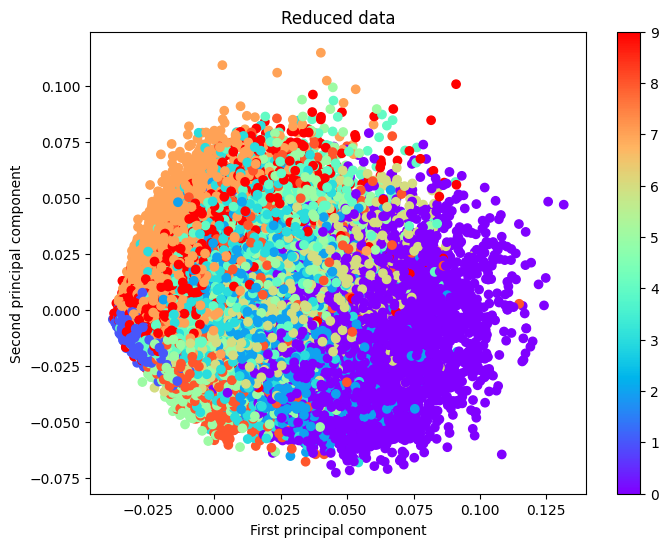

In [14]:
plt.figure(figsize=(8, 6)) # set the figure size
plt.scatter(F_train[:, 0], F_train[:, 1], c=y_train, cmap='rainbow') # plot the reduced data with colors
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Reduced data')
plt.colorbar()
plt.show()

# plot the original data

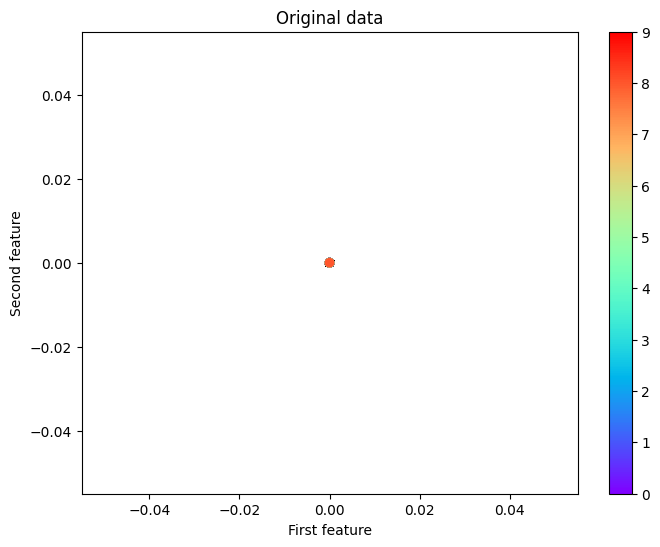

In [15]:
plt.figure(figsize=(8, 6)) # set the figure size
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='rainbow') # plot the original data with colors
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('Original data')
plt.colorbar()
plt.show()

# complete below function using python PCA function

In [16]:
def do_pca(n_components, data):
    # input number of component and not normalized data set. output is the projected dataset
    scaler = StandardScaler() # create a scaler object
    data_scaled = scaler.fit_transform(data) # fit and transform the data
    pca = PCA(n_components=n_components) # create a PCA object with n_components
    data_projected = pca.fit_transform(data_scaled) # fit and transform the data
    return data_projected # return the projected data

# define a function that gets the X data and Y labels and returns the accuracy of ml model

In [20]:
def ML_model(X, y, print_output=True):
    # split the data into train and test sets
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
    # create a logistic regression model
    model = LogisticRegression(max_iter=1000)
    # fit the model on the train set
    model.fit(X_train, y_train)
    # predict on the test set
    y_pred = model.predict(X_test)
    # calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # print the output if required
    if print_output:
        print(f'Accuracy: {accuracy}')
        print(f'Confusion matrix:\n{sklearn.metrics.confusion_matrix(y_test, y_pred)}')
    # return the accuracy score
    return accuracy

#  your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
# choose logistic regression as the ml model
# create an empty list to store the accuracies for different number of components

In [21]:
accuracies = []
# loop over the number of components from 2 to 101
for n in range(2, 102):
    # project the data using do_pca function
    X_projected = do_pca(n_components=n, data=X_train)
    # get the accuracy using ML_model function without printing output
    accuracy = ML_model(X_projected, y_train, print_output=False)
    # append the accuracy to the list
    accuracies.append(accuracy)


# plot the accuracy based on components

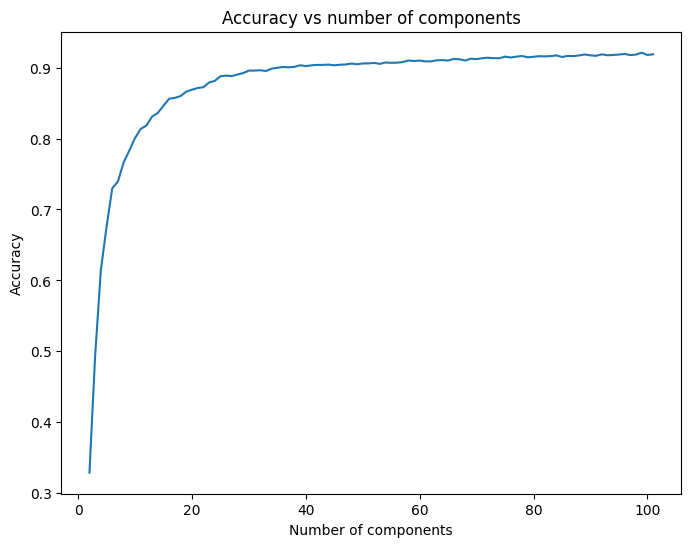

In [22]:
plt.figure(figsize=(8, 6)) # set the figure size
plt.plot(range(2, 102), accuracies) # plot the accuracies vs number of components
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs number of components')
plt.show()

#  print the number of components that maximize the accuracy and the max accuracy

In [23]:
max_index = np.argmax(accuracies) # find the index of the maximum accuracy
max_n = max_index + 2 # find the corresponding number of components
max_accuracy = accuracies[max_index] # find the maximum accuracy

print(f'Number of components that maximize the accuracy: {max_n}')
print(f'Maximum accuracy: {max_accuracy}')

Number of components that maximize the accuracy: 99
Maximum accuracy: 0.9209166666666667
